In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model 

In [6]:
# 1. Load Data
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_count_vectorized.csv')  # Update with actual dataset

In [7]:
df.head()

,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,1,0,0,0,1,6,...,0,0,1,0,0,4,0,0,0,0


In [8]:
df_data = df.drop(columns=["Label"])  # Remove the 'Label' column as it's not needed for LDA
df_data

,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,6,0,...,0,0,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4
916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# 2. Fit LDA model on the word count data
num_topics = 2  # You can adjust this as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(df_data)

LatentDirichletAllocation(n_components=2, random_state=42)

In [30]:
# 3. Display Top Words per Topic
def display_topics(model, feature_names, num_words=15):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

In [31]:
# Feature names (words in the dataset)
feature_names = df_data.columns
display_topics(lda_model, feature_names)

Topic 1: said, us, also, trump, new, company, government, year, one, india, people, would, ai, years, like
Topic 2: ai, data, market, technology, new, business, also, learning, like, solutions, digital, security, systems, tools, global


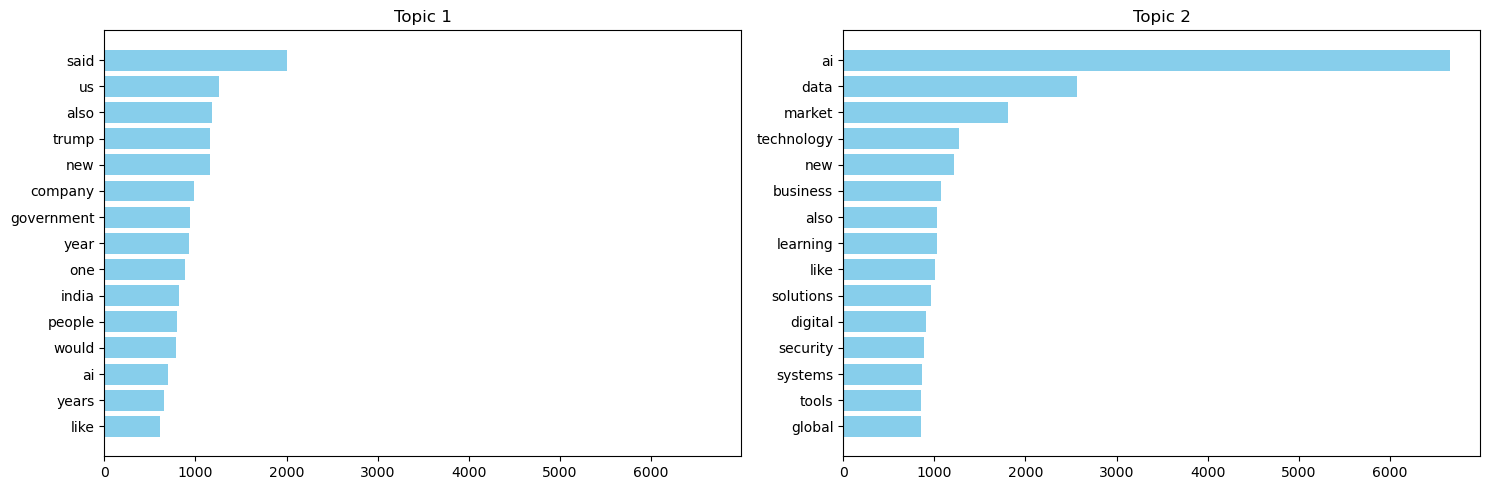

In [32]:
# 4. Visualize Topics with Word Distribution
def plot_top_words(model, feature_names, num_words=15):
    fig, axes = plt.subplots(1, num_topics, figsize=(15, 5), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features = topic.argsort()[-num_words:][::-1]
        words = [feature_names[i] for i in top_features]
        weights = topic[top_features]
        
        axes[topic_idx].barh(words, weights, color='skyblue')
        axes[topic_idx].set_title(f"Topic {topic_idx + 1}")
        axes[topic_idx].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

plot_top_words(lda_model, feature_names)

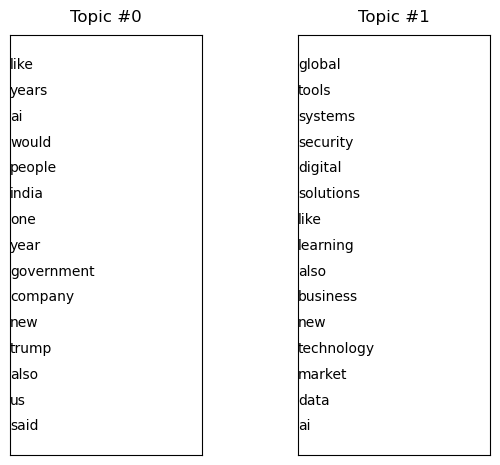

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lda_topics(model, feature_names, num_words=15):
    num_topics = model.n_components  # Number of topics
    fig, axes = plt.subplots(1, num_topics, figsize=(num_topics * 2.5, 6), sharex=True)  # Reduce width per topic

    for topic_idx, topic in enumerate(model.components_):
        top_features = topic.argsort()[-num_words:][::-1]  # Get top words
        words = [feature_names[i] for i in top_features]
        weights = topic[top_features]

        # Adjust subplot size
        ax = axes[topic_idx] if num_topics > 1 else axes  # Handle single topic case
        ax.barh(words, weights, color='white')  # Invisible bars
        ax.set_xticks([])  # Remove x-axis
        ax.set_yticks([])  # Remove y-axis
        ax.set_xlim(0, max(weights) * 1.1)  # Adjust width based on largest weight
        
        # Display words in a compact box
        for i, word in enumerate(words):
            ax.text(0, i, word, fontsize=10, ha='left', va='center')

        ax.set_title(f"Topic #{topic_idx}", fontsize=12, pad=10)

    plt.subplots_adjust(left=0.02, right=0.98, top=0.85, bottom=0.15, wspace=0.5)  # Reduce excess spacing
    plt.show()

# Call function after LDA model is trained
plot_lda_topics(lda_model, feature_names, num_words=15)